<a href="https://colab.research.google.com/github/metard/ISIC_ImageProcessing_final/blob/main/Overview_of_Colaboratory_Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SAYISAL GÖRÜNTÜ İŞLEME DERSİ FİNAL ÖDEVİ
## 1.Veri hazırlığı ve indirme

In [2]:
# 1. Kütüphaneleri içe aktar ve veriyi indir
import os
import zipfile

# Google Drive'dan indirme aracı
!pip install --upgrade gdown

# Veri setini indir (Verdiğin ID kullanıldı)
file_id = '1avsAZpYaKvgAg55KBuLPm0z_mFwyUq2-'
url = f'https://drive.google.com/uc?id={file_id}'
output = 'isic_data.zip'

!gdown {url} -O {output}

# Zip dosyasını çıkart
with zipfile.ZipFile(output, 'r') as zip_ref:
    zip_ref.extractall('/content/data')

print("Veri başarıyla indirildi ve /content/data altına çıkarıldı.")

Downloading...
From (original): https://drive.google.com/uc?id=1avsAZpYaKvgAg55KBuLPm0z_mFwyUq2-
From (redirected): https://drive.google.com/uc?id=1avsAZpYaKvgAg55KBuLPm0z_mFwyUq2-&confirm=t&uuid=89182688-6f22-460e-aaf9-5282020d63ce
To: /content/isic_data.zip
100% 825M/825M [00:19<00:00, 41.5MB/s]
Veri başarıyla indirildi ve /content/data altına çıkarıldı.


## Dataframe Oluşturma ve Örnek veri Gösterme

In [3]:
import pandas as pd
from glob import glob

# Veri setinin çıkarıldığı ana dizin (Klasör yapına göre burayı güncellemen gerekebilir)
base_path = '/content/data'

# Tüm resim yollarını topla (jpg veya png formatına göre)
image_paths = glob(os.path.join(base_path, '**/*.jpg'), recursive=True)

# Örnek bir DataFrame oluşturma (Vize ödevindeki mantıkla)
data_list = []
for path in image_paths:
    label = os.path.basename(os.path.dirname(path)) # Klasör adı etiket ise
    data_list.append({'path': path, 'label': label})

df = pd.DataFrame(data_list)
print(f"Toplam görüntü sayısı: {len(df)}")
print(df.head())

Toplam görüntü sayısı: 2357
                                            path     label
0  /content/data/Train/melanoma/ISIC_0000157.jpg  melanoma
1  /content/data/Train/melanoma/ISIC_0000441.jpg  melanoma
2  /content/data/Train/melanoma/ISIC_0010690.jpg  melanoma
3  /content/data/Train/melanoma/ISIC_0010391.jpg  melanoma
4  /content/data/Train/melanoma/ISIC_0010630.jpg  melanoma


## 3.Adım Örnek Resim ile BGR Formatından RGB ve GRAY Dönüşümü Sağlama

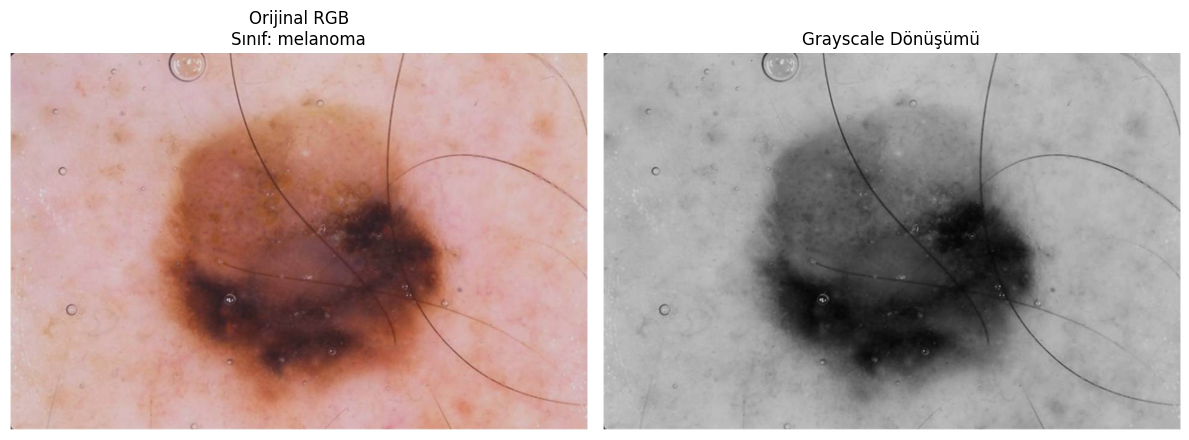

Görüntü başarıyla işlendi: /content/data/Train/melanoma/ISIC_0000157.jpg


In [11]:
import cv2
import matplotlib.pyplot as plt

# 1. Görüntü Okuma ve Dönüştürme Fonksiyonları (Vize ödevindeki gibi)
def read_rgb(path):
    """OpenCV ile görüntüyü okur ve BGR -> RGB dönüşümü yapar."""
    img = cv2.imread(path)
    if img is None:
        raise ValueError(f"Resim okunamadı, yolu kontrol edin: {path}")
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

def to_gray(img_rgb):
    """RGB formatındaki görüntüyü Grayscale (gri seviye) formatına dönüştürür."""
    return cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

# 2. DataFrame'den ilk resmi seçme ve dönüştürme
# Senin oluşturduğun df içindeki 'path' sütununu kullanıyoruz
sample_path = df.iloc[0]['path']
sample_label = df.iloc[0]['label']

img_rgb = read_rgb(sample_path)
img_gray = to_gray(img_rgb)

# 3. Görselleştirme (Yan Yana)
plt.figure(figsize=(12, 6))

# Sol taraf: RGB
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title(f"Orijinal RGB\nSınıf: {sample_label}")
plt.axis("off")

# Sağ taraf: Grayscale
plt.subplot(1, 2, 2)
plt.imshow(img_gray, cmap="gray")
plt.title("Grayscale Dönüşümü")
plt.axis("off")

plt.tight_layout()
plt.show()

print(f"Görüntü başarıyla işlendi: {sample_path}")